In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Define raw samples
nba = np.array([199, 226, 183, 221, 201])
normal = np.array([156, 160, 172, 169, 182])

# Merge samples to form a synthetic general population
merged = np.concatenate([nba, normal])


In [29]:
# Resample means from merged population
np.random.seed(42)
merged_resampled_means = []

# Do 10,000 resamples of size 5 to match NBA sample size
for _ in range(10000):
    sample = np.random.choice(merged, size=5, replace=True)
    merged_resampled_means.append(np.mean(sample))



In [30]:
# Convert to array for plotting
merged_resampled_means = np.array(merged_resampled_means)
# Compute the 95th percentile of the merged resampled means
percentile_95 = np.percentile(merged_resampled_means, 95)


In [31]:
# Estimate NBA mean using Central Limit Theorem
nba_resampled_means = []

# 10,000 simulations of sample mean from NBA data (sample size = 5)
for _ in range(10000):
    sample = np.random.choice(nba, size=5, replace=True)
    nba_resampled_means.append(np.mean(sample))

nba_mean_estimate = np.mean(nba_resampled_means)

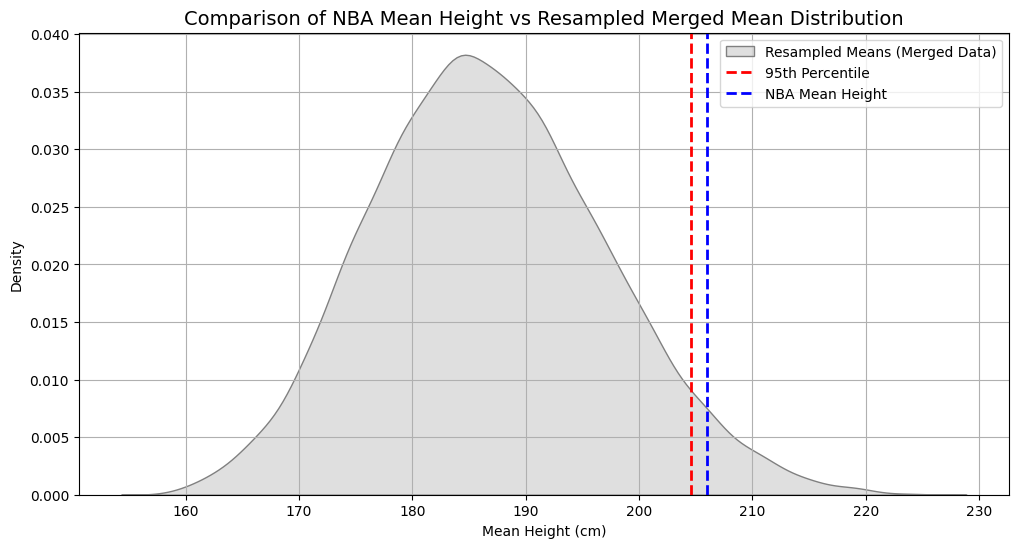

In [32]:
# Plot the KDE of resampled means from merged data
plt.figure(figsize=(12, 6))
sns.kdeplot(merged_resampled_means, fill=True, color="gray", label="Resampled Means (Merged Data)")

# Red line: 95th percentile of synthetic distribution
plt.axvline(percentile_95, color="red", linestyle="--", linewidth=2, label="95th Percentile")

# Blue line: actual NBA mean height
plt.axvline(nba_mean_estimate, color="blue", linestyle="--", linewidth=2, label="NBA Mean Height")

# 🎨 Styling
plt.title("Comparison of NBA Mean Height vs Resampled Merged Mean Distribution", fontsize=14)
plt.xlabel("Mean Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
